In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np

In [10]:
datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = datagen.flow_from_directory(
        'TRAIN',
        target_size=(64, 64),
        batch_size=16,
        class_mode='categorical' )

Found 9957 images belonging to 4 classes.


In [12]:
from keras import backend as K
K.clear_session()

In [13]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.fit(
        train_generator,
        epochs=50,
        steps_per_epoch=train_generator.n//train_generator.batch_size)

Epoch 1/50
622/622 [==============================] - 18s 27ms/step - loss: 1.3870 - accuracy: 0.2667
Epoch 2/50
622/622 [==============================] - 18s 29ms/step - loss: 1.3721 - accuracy: 0.3062
Epoch 3/50
622/622 [==============================] - 19s 30ms/step - loss: 1.1998 - accuracy: 0.4467
Epoch 4/50
622/622 [==============================] - 19s 30ms/step - loss: 0.9188 - accuracy: 0.5929
Epoch 5/50
622/622 [==============================] - 18s 30ms/step - loss: 0.8050 - accuracy: 0.6467
Epoch 6/50
622/622 [==============================] - 18s 30ms/step - loss: 0.7208 - accuracy: 0.6834
Epoch 7/50
622/622 [==============================] - 19s 30ms/step - loss: 0.6593 - accuracy: 0.7112
Epoch 8/50
622/622 [==============================] - 19s 31ms/step - loss: 0.6072 - accuracy: 0.7434
Epoch 9/50
622/622 [==============================] - 19s 30ms/step - loss: 0.5688 - accuracy: 0.7654
Epoch 10/50
622/622 [==============================] - 19s 30ms/step - loss: 0.526

In [15]:
model.fit(
        train_generator,
        epochs=50,
        steps_per_epoch=train_generator.n//train_generator.batch_size
        )

Epoch 1/50
622/622 [==============================] - 287s 461ms/step - loss: 1.3921 - accuracy: 0.2461
Epoch 2/50
622/622 [==============================] - 286s 460ms/step - loss: 1.3869 - accuracy: 0.2489
Epoch 3/50
622/622 [==============================] - 286s 460ms/step - loss: 1.3862 - accuracy: 0.2570
Epoch 4/50
269/622 [===========>..................] - ETA: 2:43 - loss: 1.3831 - accuracy: 0.2763

KeyboardInterrupt: 

In [32]:
print(model.get_weights())

[array([[[[-4.99976754e-01, -8.15272629e-02,  2.66593575e-01,
          -9.37501341e-02, -1.80604905e-01, -1.63026333e-01,
          -3.33279401e-01, -9.57456008e-02,  4.69312072e-03,
           4.02958393e-01,  4.87175323e-02, -3.74904633e-01,
          -1.57557875e-01,  3.02819133e-01,  3.42617631e-01,
           4.16513026e-01, -1.63982987e-01,  5.82993999e-02,
           1.00464694e-01,  1.59836560e-01,  1.89340517e-01,
          -4.65957187e-02,  2.55108744e-01, -1.21974349e-01,
           1.66870400e-01, -4.81076658e-01,  6.15982711e-02,
           2.06755057e-01,  2.59943664e-01,  4.58528288e-02,
           6.68566972e-02, -3.26959729e-01],
         [-5.80206931e-01, -1.12014823e-03,  3.56247365e-01,
           8.22201669e-02,  3.62223119e-01, -2.55603909e-01,
          -1.35759208e-02, -1.94340184e-01,  1.07332729e-01,
           3.97438616e-01, -5.17744161e-02, -5.07937014e-01,
          -1.44618005e-01,  6.48551136e-02, -2.03441247e-01,
          -2.21152648e-01,  1.00768462e

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'TEST',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 2487 images belonging to 4 classes.


In [30]:
scores = model.evaluate(test_generator)
print('Loss: %.4f' % scores[0])
print('Accuracy: %.4f' % scores[1])

78/78 [==============================] - 2s 27ms/step - loss: 1.0622 - accuracy: 0.8271
Loss: 1.0622
Accuracy: 0.8271


In [31]:
predictions = model.predict(test_generator)

78/78 [==============================] - 2s 26ms/step


In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

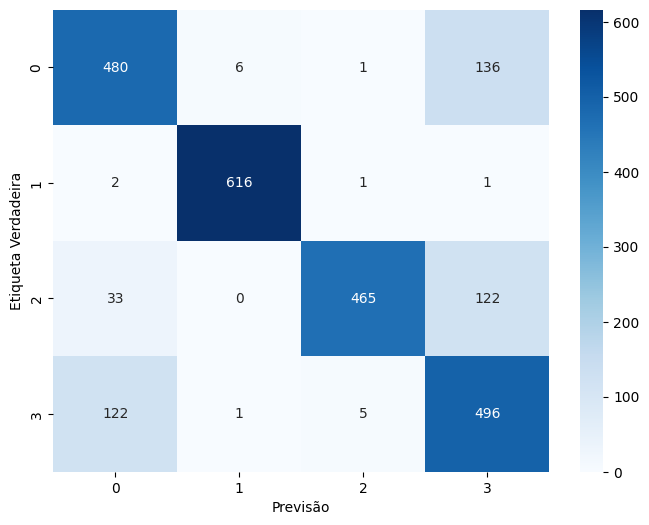

In [24]:
true_labels = test_generator.classes # obtem as etiquetas verdadeiras
predicted_labels = np.argmax(predictions, axis=1) # obtem as previsoes do modelo

# cria a matriz de confusao
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# visualiza a matriz de confusao
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Etiqueta Verdadeira')
plt.show()

In [25]:
y_test = true_labels

y_pred = predicted_labels

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

gini_score = lambda y_true,y_score: 2*roc_auc_score(y_true,y_score)-1

print(confusion_matrix(y_test,y_pred))

print('Acurácia: %.2f' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[480   6   1 136]
 [  2 616   1   1]
 [ 33   0 465 122]
 [122   1   5 496]]
Acurácia: 0.83
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       623
           1       0.99      0.99      0.99       620
           2       0.99      0.75      0.85       620
           3       0.66      0.79      0.72       624

    accuracy                           0.83      2487
   macro avg       0.85      0.83      0.83      2487
weighted avg       0.85      0.83      0.83      2487



In [27]:
model.save("blood_cell_classification.h5")

In [28]:
import pickle
filename = 'finalized_model_images.sav'
pickle.dump(model, open(filename, 'wb'))
 


In [ ]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)